In [1]:
import numpy as np

def criaDatasetBidimensionalBinário(n=20):
    """
    Cria um dataset bidimensional binário com
    rótulos igual 1 para todo exemplo que tiver
    o valor da primeira característica maior do
    que a da segunda, e -1 para os demais.
    """
    X = np.random.uniform(size=(n,2))
    y = np.array(X[:,0]>X[:,1], dtype=int)*2-1
    return X, y

Xtr, ytr = criaDatasetBidimensionalBinário()
Xtr, ytr

(array([[0.44332958, 0.27481979],
        [0.32577598, 0.8879132 ],
        [0.90684397, 0.1109598 ],
        [0.64174533, 0.34895289],
        [0.27957405, 0.05753823],
        [0.73189073, 0.81842135],
        [0.0958666 , 0.90817671],
        [0.52980955, 0.32245365],
        [0.65395195, 0.43223917],
        [0.02724292, 0.85665727],
        [0.64100775, 0.44141242],
        [0.05036697, 0.64261738],
        [0.97093168, 0.71353164],
        [0.9620964 , 0.79291071],
        [0.30976951, 0.7198541 ],
        [0.18036736, 0.48216552],
        [0.23347327, 0.50328562],
        [0.88373533, 0.7596641 ],
        [0.93277984, 0.35534516],
        [0.7146937 , 0.97850912]]),
 array([ 1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1,  1,  1, -1, -1, -1,
         1,  1, -1]))

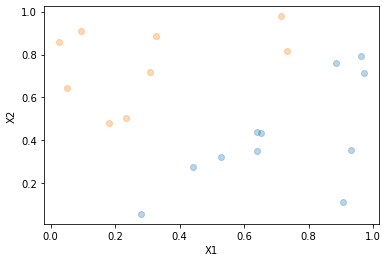

In [2]:
import matplotlib.pyplot as plt

def plotaDatasetBidimensional(X, y):
    """
    Plota um dataset bidimensional.
    """
    plt.xlabel('X1')
    plt.ylabel('X2')
    for k in set(y):
        plt.plot(X[:,0][y==k],X[:,1][y==k], "o", alpha=0.3)

plotaDatasetBidimensional(Xtr, ytr)

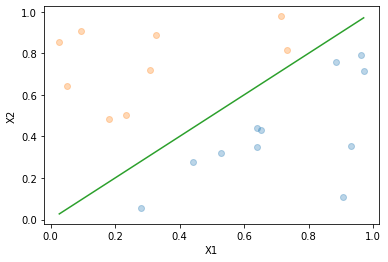

In [3]:
def plotaHiperplanoDatasetBidimensional(X, y, vetor, intercept=0):
    """
    Plota um dataset bidimensional com um hiperplano definido por um
    vetor e o valor em que este vetor intercepta o eixo vertical.
    """
    x0min = min(X[:,0])
    x0max = max(X[:,0])
    xs = np.linspace(x0min, x0max, num=2)
    ys = (-vetor[0] / vetor[1]) * xs - intercept / vetor[1]
    plt.plot(xs,ys)

plotaDatasetBidimensional(Xtr, ytr)
plotaHiperplanoDatasetBidimensional(Xtr, ytr, [1,-1])

In [4]:
def sign(a):
    return (a >= 0) * 2 - 1

In [5]:
def accuracy(yactual, ypred):
    return sum(yactual == ypred)/len(yactual)

1.0
[ 0.86966924 -0.8208829 ]


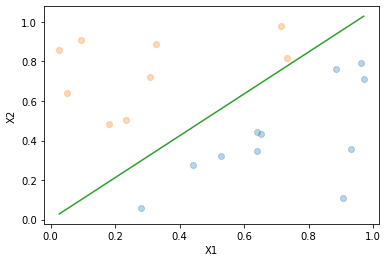

In [6]:
from sklearn.base import BaseEstimator, ClassifierMixin
import random

class Perceptron(BaseEstimator, ClassifierMixin):
    """
    Primeira versão do Perceptron treinado pelo
    Perceptron Learning Algorithm (PLA).
    """
    def __init__(self):
        self.w = None
        self.activation = sign

    def fit(self, X, y):
        self.w = np.random.uniform(-1, 1, size=X.shape[1])
        indexes = list(range(X.shape[0]))
        while True:
            any_error = False
            for i in sorted(indexes, key=lambda k: random.random()):
                x = X[i,:]
                ypred = self.predict(x)
                erro = y[i] - ypred
                if erro != 0:
                    any_error = True
                self.w += erro * x
            if not any_error:
                break

    def predict(self, X):
        a = X @ self.w
        ypred = self.activation(a)
        return ypred

perceptron = Perceptron()
perceptron.fit(Xtr, ytr)
print(accuracy(ytr, perceptron.predict(Xtr)))
print(perceptron.w)
plotaDatasetBidimensional(Xtr, ytr)
plotaHiperplanoDatasetBidimensional(Xtr, ytr, perceptron.w)

1.0
[ 4.01632113 -4.45739182]


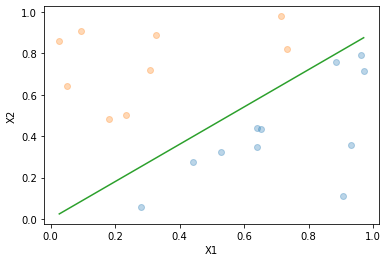

In [7]:
from sklearn.base import BaseEstimator, ClassifierMixin
import random

class Perceptron(BaseEstimator, ClassifierMixin):
    """
    Versão do Perceptron com limite de iterações,
    treinado pelo Perceptron Learning Algorithm (PLA).
    """
    def __init__(self, max_iter=100):
        self.w = None
        self.activation = sign
        self.max_iter = max_iter

    def fit(self, X, y):
        self.w = np.random.uniform(-1, 1, size=X.shape[1])
        indexes = list(range(X.shape[0]))
        for _ in range(self.max_iter):
            any_error = False
            for i in sorted(indexes, key=lambda k: random.random()):
                x = X[i,:]
                ypred = self.predict(x)
                erro = y[i] - ypred
                if erro != 0:
                    any_error = True
                self.w += erro * x
            if not any_error:
                break

    def predict(self, X):
        a = X @ self.w
        ypred = self.activation(a)
        return ypred

perceptron = Perceptron()
perceptron.fit(Xtr, ytr)
print(accuracy(ytr, perceptron.predict(Xtr)))
print(perceptron.w)
plotaDatasetBidimensional(Xtr, ytr)
plotaHiperplanoDatasetBidimensional(Xtr, ytr, perceptron.w)

In [8]:
Xte, yte = criaDatasetBidimensionalBinário(1000)

0.957


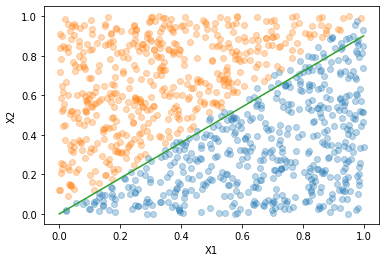

In [9]:
print(accuracy(yte, perceptron.predict(Xte)))
plotaDatasetBidimensional(Xte, yte)
plotaHiperplanoDatasetBidimensional(Xte, yte, perceptron.w)

1.0


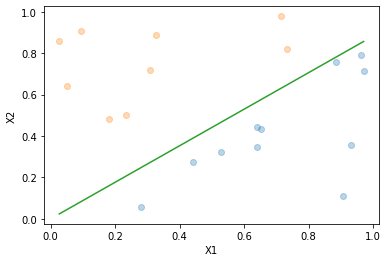

0.946


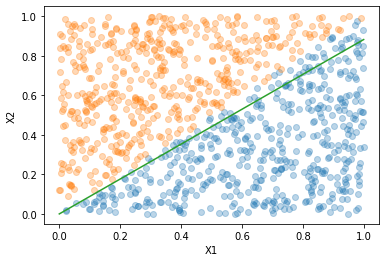

In [10]:
perceptron = Perceptron()
perceptron.fit(Xtr, ytr)
print(accuracy(ytr, perceptron.predict(Xtr)))
plotaDatasetBidimensional(Xtr, ytr)
plotaHiperplanoDatasetBidimensional(Xtr, ytr, perceptron.w)
plt.show()

print(accuracy(yte, perceptron.predict(Xte)))
plotaDatasetBidimensional(Xte, yte)
plotaHiperplanoDatasetBidimensional(Xte, yte, perceptron.w)